# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# read data
Train_df = pd.read_csv('/content/gdrive/MyDrive/ML2/train.csv')
Test_df = pd.read_csv('/content/gdrive/MyDrive/ML2/test.csv')

Train_df.head()

,body,subreddit
0,Try resetting your KAM (Keep alive memory). Se...,Ford
1,So I bought it 11 Days ago for Ford dealership...,Ford
2,"Trucks have governors, typically at 95-105 mph...",Ford
3,The trucks are electronically limited. If you ...,Ford
4,Despite needing an alternator on my 2011 gasol...,Ford


In [ ]:
Test_df.head()

,id,body
0,0,I just used it for the first time as an experi...
1,1,Honestly I?d rather stick with the old sync 3 ...
2,2,"As a proud owner of a 2021 Edge Titanium, this..."
3,3,I actually don't hate the implementation. The ...
4,4,It's stupid. Relying on one thing to control m...


# data visualization and analysis

Obama    180
Trump    180
Ford     179
Musk     179
Name: subreddit, dtype: int64


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='subreddit'>

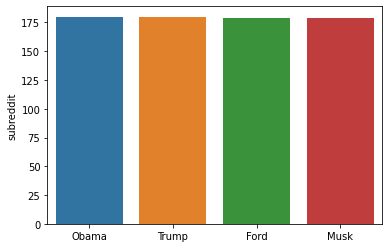

In [ ]:
import seaborn as sns
# exploratory data analysis
x=Train_df['subreddit'].value_counts()
print(x)
sns.barplot(x.index,x)

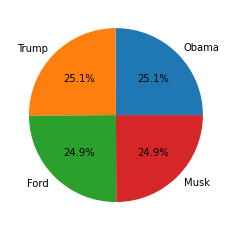

In [ ]:

# calculate the percentage of each class
class_counts = Train_df['subreddit'].value_counts(normalize=True) * 100

# create a pie chart of the percentage of classes
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')


plt.show()

In [ ]:
# WORD-COUNT
Train_df['word_count'] = Train_df['body'].apply(lambda x: len(str(x).split()))
print(Train_df[Train_df['subreddit']=='Ford']['word_count'].mean()) #Disaster tweets
print(Train_df[Train_df['subreddit']=='Musk']['word_count'].mean()) #Non-Disaster tweets
print(Train_df[Train_df['subreddit']=='Trump']['word_count'].mean()) #Non-Disaster tweets
print(Train_df[Train_df['subreddit']=='Obama']['word_count'].mean()) #Non-Disaster tweets

75.35195530726257
202.18994413407822
72.88333333333334
60.02777777777778


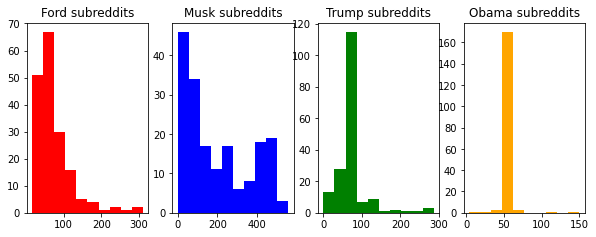

In [ ]:
# PLOTTING WORD-COUNT
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(10,3.5))
train_words=Train_df[Train_df['subreddit']=='Ford']['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Ford subreddits')
train_words=Train_df[Train_df['subreddit']=='Musk']['word_count']
ax2.hist(train_words,color='blue')
ax2.set_title('Musk subreddits')
train_words=Train_df[Train_df['subreddit']=='Trump']['word_count']
ax3.hist(train_words,color='green')
ax3.set_title('Trump subreddits')
train_words=Train_df[Train_df['subreddit']=='Obama']['word_count']
ax4.hist(train_words,color='orange')
ax4.set_title('Obama subreddits')
plt.show()

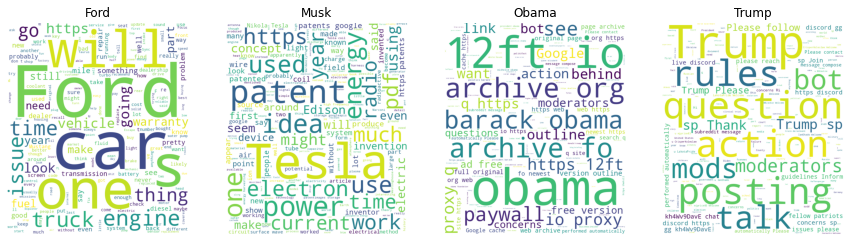

In [ ]:

from wordcloud import WordCloud

# create a figure with four subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 100))

# loop through each category
for i, category in enumerate(Train_df['subreddit'].unique()):
    # filter the dataframe to only contain the current category
    text = ' '.join(Train_df[Train_df['subreddit'] == category]['body'])
    # create a word cloud for the current category
    wordcloud = WordCloud(width=600, height=700, background_color='white').generate(text)
    # plot the word cloud in the current subplot
    axs[i].imshow(wordcloud)
    axs[i].axis('off')
    axs[i].set_title(category)

plt.show()


# Naive Bayes From Scratch

In [ ]:
import pandas as pd
import numpy as np
import math

class BNBClassifier:

  def __init__(self, Alpha = 1):
    self.Alpha = Alpha
    self.ClassLabels = dict()
    self.SepratingClasses = dict()

  def FitModel(self, X, y):
    
    #NOTE: Calculate the probability of each class
    for item in y:
      if (item not in self.ClassLabels):
        self.ClassLabels[item] = 1
      else:
        self.ClassLabels[item] += 1;
    NumberofClasses = len(self.ClassLabels)
    SumofLabels = sum(list(self.ClassLabels.values()))
    self.ClassProbability = [(self.ClassLabels[item]/SumofLabels) for item in self.ClassLabels]
    #NOTE: Calculate the probability of each feature given each class
    for item in range(len(X)):
      label = y[item]
      if (label not in self.SepratingClasses):
        self.SepratingClasses[label] = list()
      self.SepratingClasses[label].append(X[item])
    Keyorder = self.ClassLabels.keys()
    self.SepratingClasses = {key: self.SepratingClasses[key] for key in Keyorder}
    self.FeatureClassProb = list()
    for item in self.SepratingClasses:
      probabilities = list()
      for j in range(len(self.SepratingClasses[item][0])): # It is the number of features
        sumcol = 0
        for iter in range(len(self.SepratingClasses[item])):
          sumcol += self.SepratingClasses[item][iter][j]
        #NOTE: Calculate the probability by considering the smoothing laplace effect
        Theta = (sumcol + self.Alpha)/(self.ClassLabels[item] + self.Alpha + 1)
        probabilities.append(Theta)
        Theta = 0
      self.FeatureClassProb.append(probabilities)
    return self.ClassProbability, self.FeatureClassProb

  def PredictModel(self, X):
    Labels = [*self.SepratingClasses]
    ProbIdx = list()
    for i in X:
      Delta = list()
      for item in range(len(self.ClassProbability)):# Number of classes
        Sumation = 0
        for iter in range(len(self.FeatureClassProb[0])):# Number of features
          Sumation += ((i[iter]*np.log10(self.FeatureClassProb[item][iter])) + ((1-i[iter])*np.log10(1-self.FeatureClassProb[item][iter])))
        Delta.append(np.log10(self.ClassProbability[item]) + Sumation)
      #Delta = list(map(abs, Delta))
      ProbIdx.append(Delta.index(max(Delta)))
    PredictedValue = list()
    for item in ProbIdx:
      PredictedValue.append(Labels[item])
    return(PredictedValue)
  
  def Accuracy(self, TrueValues, PredictedValues):

    #Calculates accuracy of the true labels and predicted labels.
    correct_predictions = 0
    for true, predicted in zip(TrueValues, PredictedValues):
        if true == predicted:
            correct_predictions += 1

    accuracy = correct_predictions / len(TrueValues)
    return accuracy




# Prepare data

In [ ]:
subreddit = {'Ford': 1, 'Musk': 2, 'Trump':3, 'Obama':4}
# traversing through dataframe
# Gender column and writing
# values where key matches
Train_df.subreddit = [subreddit[item] for item in Train_df.subreddit]

Train_df.head()

,body,subreddit,word_count
0,Try resetting your KAM (Keep alive memory). Se...,1,112
1,So I bought it 11 Days ago for Ford dealership...,1,53
2,"Trucks have governors, typically at 95-105 mph...",1,53
3,The trucks are electronically limited. If you ...,1,91
4,Despite needing an alternator on my 2011 gasol...,1,75


In [ ]:
df_train = Train_df.sample(frac = 1)
df_train.head()

,body,subreddit,word_count
362,"\nIf the link is behind a paywall, or for an a...",4,60
202,>The simplest form of nuclear battery is the B...,2,490
171,I would just leave it be unless your actually ...,1,64
299,This is a 270-page book about a toroidal spira...,2,50
220,Al Hubbard was not known to be a protege of Te...,2,362


In [ ]:
X_train = df_train["body"]
y_train = df_train["subreddit"]
X_test  = Test_df["body"]

In [ ]:
def csv_create(y_pred_test,name):
  dataframe_test = pd.DataFrame(np.arange(len(y_pred_test)), columns=['id'])
  dataframe_test['subreddit'] = y_pred_test
  subreddit = {1:'Ford', 2:'Musk', 3:'Trump', 4:'Obama'}
  # traversing through dataframe
  # Gender column and writing
  # values where key matches
  dataframe_test.subreddit = [subreddit[item] for item in dataframe_test.subreddit]
  dataframe_test.head()
  dataframe_test.to_csv(name,index=False)

# Unique preprocseeing

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# remove stop words from text messages



from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

my_stop_words = text.ENGLISH_STOP_WORDS.union(["book"])

stop_words = set(stopwords.words('english'))
stopw = stopwords.words('english')
stopw.append('removed')
stopw.append('www')
stopw.append(my_stop_words)
stopw.append('http')
stopw.append('https')
stopw.append('poll')
stopw.append('reddit')
stopw.append('subreddit')
stopw.append('twitter')
stopw.append('/Trump')
stopw.append('/Obama')
stopw.append('/Musk')
stopw.append('/Ford')




# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()
snow_stemmer = SnowballStemmer(language='english')

In [ ]:
def pre_processing(text_messages):

  # use regular expressions to replace email addresses, URLs, phone numbers, other numbers

  # Replace email addresses with 'email'
  processed = text_messages.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

  processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stopw))

  # Replace URLs with 'webaddress'
  processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

  # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
  processed = processed.str.replace(r'£|\$', 'moneysymb')
    
  # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
  processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumbr')
    
  # Replace numbers with 'numbr'
  processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

  # Remove punctuation
  processed = processed.str.replace(r'[^\w\d\s]', ' ')

  # Replace whitespace between terms with a single space
  processed = processed.str.replace(r'\s+', ' ')

  # Remove leading and trailing whitespace
  processed = processed.str.replace(r'^\s+|\s+?$', '')

  # change words to lower case - Hello, HELLO, hello are all the same word
  processed = processed.str.lower()

  processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stopw))
  
  processed = processed.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))# Remove word stems using a Porter stemmer

  return processed


In [ ]:
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)
    
wl = WordNetLemmatizer()

# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence

In [ ]:
def finalpreprocess(string):
    return lemmatizer(string)

In [ ]:
X_train = pre_processing(X_train)
X_test = pre_processing(X_test)

X_train = X_train.apply(lambda x: finalpreprocess(x))
X_test = X_test.apply(lambda x: finalpreprocess(x))



<ipython-input-343-5161a3892a60>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  processed = text_messages.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
<ipython-input-343-5161a3892a60>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
<ipython-input-343-5161a3892a60>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  processed = processed.str.replace(r'£|\$', 'moneysymb')
<ipython-input-343-5161a3892a60>:20: FutureWarning: The default value of regex will change from True to False in a future version.
  processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
<ipython-input-343-5161a3892a60>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  processed = processed.str.replace(r'\d+(\.\d+)?

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.preprocessing import Normalizer
normalizer_train = Normalizer()


tfidf = CountVectorizer( binary=True)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

print(X_train[0])

selector = SelectKBest(chi2, k=2500) # select top 2 features
X_train_tfidf = selector.fit_transform(X_train_tfidf,y_train)
X_test_tfidf = selector.transform(X_test_tfidf)

print(X_train_tfidf.shape)

tri reset kam keep aliv memori see improv unplug one onumbr sensor reset kam cold start truck make truck default valu learn time ignor onumbr sensor run good improv make could also tri unplug maf thing either way base number pcm subtract fuel reason like vehicl get enough air could faulti sensor wire make sen warm ok throttl plate move ok hand idea start
(718, 2500)


# Validation split

In [ ]:
X_train, X_val, Y_Train, Y_Val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # plt.tight_layout()
    tick_marks = np.arange(len(set(Y_Train)))
    plt.xticks(tick_marks, sorted(set(Y_Train)))
    plt.yticks(tick_marks, sorted(set(Y_Train)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Train the classifier and calculate accuracy after each iteration
def plot_accuracy(accuracies):

  # Plot the accuracy diagram
  plt.plot(range(100, 1001, 100), accuracies)
  plt.xlabel('Training samples')
  plt.ylabel('Accuracy')
  plt.show()


In [ ]:
def fit_model(clf, x_train, y_train, x_val, y_val):
  accuracies = []
  for i in range(1, 11):
    clf.fit(x_train[:i*100], y_train[:i*100])
    y_pred = clf.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)
  return accuracies, y_pred


In [ ]:
def model_fit(clfx, X_train, Y_Train, X_val, Y_Val):
  accuracies, y_pred = fit_model(clfx, X_train, Y_Train, X_val, Y_Val)
  plot_accuracy(accuracies)
  cm = metrics.confusion_matrix(Y_Val, y_pred)
  plot_confusion_matrix(cm, ['True', 'False'])

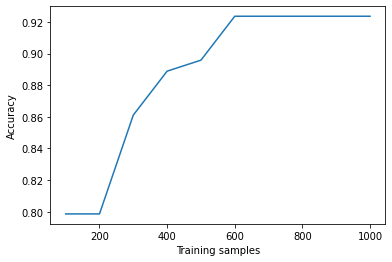

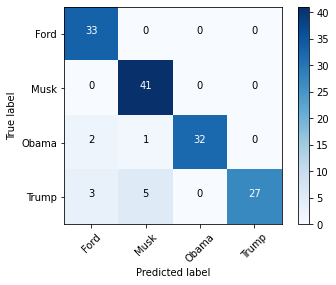

In [ ]:
## Now we instantiate the classifier. Remember this can be any classifier, even the one you make.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree



clf1 = LogisticRegression(random_state=42, max_iter=100, solver='lbfgs')
model_fit(clf1, X_train, Y_Train, X_val, Y_Val)



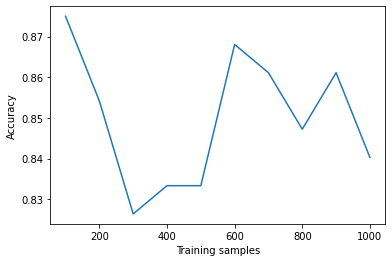

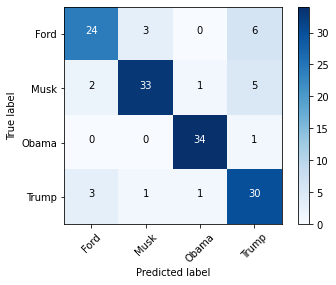

In [ ]:
clf2 = tree.DecisionTreeClassifier()
model_fit(clf2, X_train, Y_Train, X_val, Y_Val)

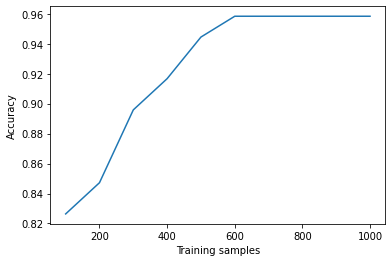

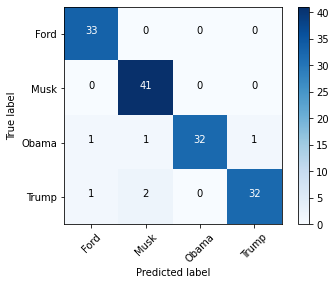

In [ ]:
from sklearn import svm

clf3 = svm.SVC(kernel = 'linear',degree=1)
model_fit(clf3, X_train, Y_Train, X_val, Y_Val)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

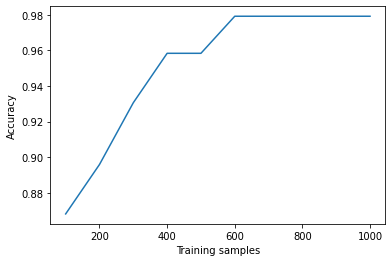

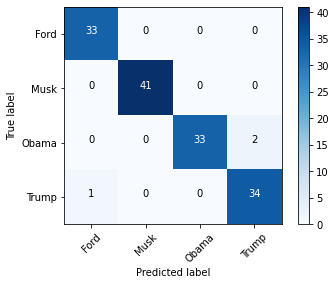

In [ ]:
from sklearn.neural_network import MLPClassifier

clf4 = MLPClassifier(random_state=1, max_iter=100)
model_fit(clf4, X_train, Y_Train, X_val, Y_Val)

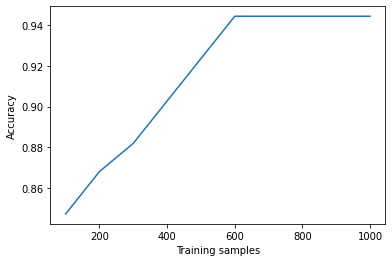

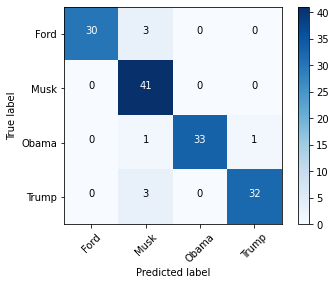

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf5 = GaussianNB()
model_fit(clf5, X_train, Y_Train, X_val, Y_Val)

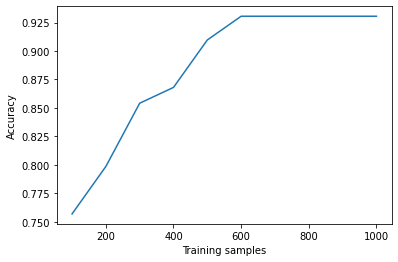

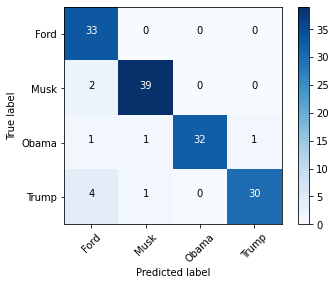

In [ ]:
from sklearn.svm import SVC
cf6 = SVC(kernel = 'rbf', random_state = 42)
model_fit(cf6, X_train, Y_Train, X_val, Y_Val)

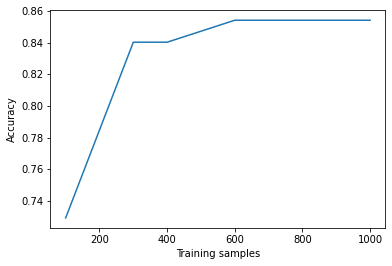

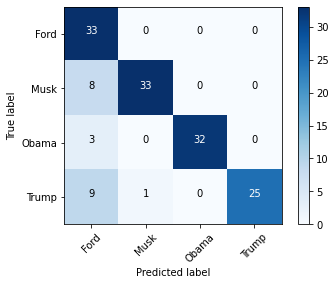

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf7 = RandomForestClassifier(max_depth=15, random_state=42)
model_fit(clf7, X_train, Y_Train, X_val, Y_Val)


# K-fold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

# Load your dataset and split into features and target

# Define your models
logistic_model = LogisticRegression(penalty='l2', max_iter=100)
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier(max_depth=15, random_state=42)
svm_model = SVC(kernel = 'rbf', random_state = 42)
MNB = MultinomialNB(alpha=0.1)
Mlp_cls = MLPClassifier(random_state=1, max_iter=100)
SVC = svm.SVC(kernel = 'linear',degree=1)
GNB = GaussianNB()

# Create a list of models
models = [logistic_model, decision_tree_model, random_forest_model, svm_model, GNB, Mlp_cls, SVC]
# Define the number of folds for cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate each model using cross-validation
for model in models:
    accuracy = cross_val_score(model, X_train_tfidf, y_train, cv=kfold, scoring='accuracy').mean()
    # precision = cross_val_score(model, vectors_train_Lemma, y_train, cv=kfold, scoring='precision_weighted').mean()
    # recall = cross_val_score(model, vectors_train_Lemma, y_train, cv=kfold, scoring='recall_weighted').mean()
    # f1 = cross_val_score(model, vectors_train_Lemma, y_train, cv=kfold, scoring='f1_weighted').mean()
    print('Model: ', type(model).__name__)
    print('Accuracy: ', accuracy)
    # print('Precision: ', precision)
    # print('Recall: ', recall)
    # print('F1-score: ', f1)




Model:  LogisticRegression
Accuracy:  0.9303403755868546
Model:  DecisionTreeClassifier
Accuracy:  0.8913732394366198
Model:  RandomForestClassifier
Accuracy:  0.8537949921752739
Model:  SVC
Accuracy:  0.896870109546166
Model:  GaussianNB
Accuracy:  0.9038341158059469


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Model:  MLPClassifier
Accuracy:  0.9359937402190923
Model:  SVC
Accuracy:  0.9247848200312989


# Training

In [ ]:
'''
Bernouli Naive Bayes accuracy
'''
mynb = BNBClassifier()
mynb.FitModel(X_train_tfidf, y_train)
y_pred = mynb.PredictModel(X_train_tfidf)
BNBaccuracy = mynb.Accuracy(Y_Val, y_pred)
print('Naive Bayes Accuracy: ', BNBaccuracy)

In [ ]:
## Now we instantiate the classifier. Remember this can be any classifier, even the one you make.
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf1 = LogisticRegression(penalty='l2', max_iter=7)
start_time = time.time()
clf1.fit(X_train_tfidf, y_train)
y_pred_train_1 = clf1.predict(X_train_tfidf)
y_pred_test_1 = clf1.predict(X_test_tfidf)
## So now we see we have a set of predictions.
end_time = time.time()
runtime = end_time - start_time

print("Runtime:", runtime)
print(accuracy_score(y_train, y_pred_train_1))



Runtime: 0.16419267654418945
0.9958217270194986


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn import svm
from sklearn.svm import SVC

clf2 = SVC(kernel = 'rbf', random_state = 42)
start_time = time.time()
clf2.fit(X_train_tfidf, y_train)
y_pred_train_2 = clf2.predict(X_train_tfidf)
y_pred_test_2 = clf2.predict(X_test_tfidf)

end_time = time.time()
runtime = end_time - start_time

print("Runtime:", runtime)

print(accuracy_score(y_train, y_pred_train_2))


Runtime: 1.3597102165222168
0.9735376044568245


In [ ]:
from sklearn import tree

clf4 = tree.DecisionTreeClassifier()
start_time = time.time()
clf4.fit(X_train_tfidf, y_train)

y_pred_train = clf4.predict(X_train_tfidf)
y_pred_test = clf4.predict(X_test_tfidf)

end_time = time.time()
runtime = end_time - start_time

print("Runtime:", runtime)

print(accuracy_score(y_train, y_pred_train))


Runtime: 0.04737663269042969
1.0


In [ ]:
from sklearn.neural_network import MLPClassifier

clf5 = MLPClassifier(random_state=1, max_iter=100)
start_time = time.time()
clf5.fit(X_train_tfidf, y_train)

y_pred_train = clf5.predict(X_train_tfidf)
y_pred_test = clf5.predict(X_test_tfidf)

end_time = time.time()
runtime = end_time - start_time

print("Runtime:", runtime)

print(accuracy_score(y_train, y_pred_train))


Runtime: 5.007559776306152
1.0


In [ ]:
GNB = GaussianNB()
start_time = time.time()
GNB.fit(X_train_tfidf, y_train)

y_pred_train = GNB.predict(X_train_tfidf)
y_pred_test = GNB.predict(X_test_tfidf)

end_time = time.time()
runtime = end_time - start_time

print("Runtime:", runtime)

print(accuracy_score(y_train, y_pred_train))



Runtime: 0.20133399963378906
0.9986072423398329


In [ ]:
SVC = svm.SVC(kernel = 'linear',degree=1)
start_time = time.time()
SVC.fit(X_train_tfidf, y_train)

y_pred_train = SVC.predict(X_train_tfidf)
y_pred_test = SVC.predict(X_test_tfidf)

end_time = time.time()
runtime = end_time - start_time

print("Runtime:", runtime)

print(accuracy_score(y_train, y_pred_train))

Runtime: 1.1335227489471436
1.0


In [ ]:
random_forest_model = RandomForestClassifier(max_depth=15, random_state=42)
start_time = time.time()
SVC.fit(X_train_tfidf, y_train)

y_pred_train = SVC.predict(X_train_tfidf)
y_pred_test = SVC.predict(X_test_tfidf)

end_time = time.time()
runtime = end_time - start_time

print("Runtime:", runtime)

print(accuracy_score(y_train, y_pred_train))

Runtime: 0.9566688537597656
1.0


# Best one for Kaggle

In [ ]:
from sklearn.neural_network import MLPClassifier

clf5 = MLPClassifier(random_state=1, max_iter=100)
start_time = time.time()
clf5.fit(X_train_tfidf, y_train)

y_pred_train = clf5.predict(X_train_tfidf)
y_pred_test = clf5.predict(X_test_tfidf)

end_time = time.time()
runtime = end_time - start_time

print("Runtime:", runtime)

print(accuracy_score(y_train, y_pred_train))

csv_create(y_pred_test,'Test.csv')